## *ESTUDO DIRIGIDO - CONTROLE E AUTOMAÇÃO 2025.2*
### Livro texto da disciplina: Sistemas de Controle Modernos - 8a Edição


Aluno: João Marcos Amorim de Almeida

# Capitulo 4: Características de Sistemas de Controle com *retroação*

Este capítulo aborda conceitos essenciais de modelagem de sistemas de controle, incluindo sensibilidade a incertezas do modelo, erros de estado estacionário e características da resposta transitória. Também explora a sensibilidade do sistema a variações de parâmetros, visando minimizar os efeitos de mudanças indesejadas.

## Sistemas de Controle em Malha Aberta e Malha Fechada
Um sistema de controle consiste na interligação de componentes para alcançar uma saída desejada. Quando a resposta real difere da desejada, um sinal proporcional ao erro é gerado e utilizado para ajustar o processo. Esse mecanismo de correção, conhecido como retroação, caracteriza os sistemas de malha fechada. Um exemplo é o controle do ritmo cardíaco humano.

## Sensibilidade a Variações de Parâmetros
A sensibilidade de um sistema refere-se à sua capacidade de detectar mudanças na saída devido a alterações nos parâmetros do processo. Sistemas com retroação reduzem o impacto dessas variações, aumentando a robustez do controle.

## Resposta Transitória
A resposta transitória descreve o comportamento do sistema ao longo do tempo. Como o objetivo é alcançar uma resposta desejada, ela deve ser ajustada até se tornar satisfatória. Enquanto sistemas de malha aberta exigem a substituição do processo para melhorar a resposta, sistemas de malha fechada permitem ajustes por meio dos parâmetros de retroação.

##Sinais de Perturbação
Perturbações são sinais indesejáveis que afetam a saída do sistema. Sistemas com retroação são eficazes em reduzir os efeitos de distorções, ruídos e perturbações externas, garantindo maior precisão na saída.

Simulações e Exemplos - Capítulo 4

In [ ]:
## Instalando a biblioteca utilizada para as simulações
!pip install control

In [ ]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

R = 20.0e3; C=10.0e-6; tau=R*C;
Tsim=1.;

numerador = [1/tau]; denominador = [1., 1/tau]
P_s = ctl.tf(numerador, denominador)
print(' FT malha aberta= ' ,P_s)

 FT malha aberta=  <TransferFunction>: sys[243]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

    5
  -----
  s + 5


In [ ]:
C_s=ctl.tf([3.],[1.])
print(' FT controlador= ' ,C_s)

 FT controlador=  <TransferFunction>: sys[244]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
dt = None

  3
  -
  1


 FT malha fechada=  <TransferFunction>: sys[247]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

    15
  ------
  s + 20


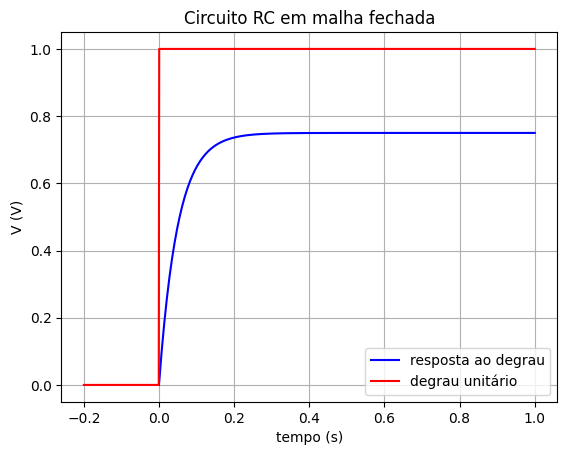

In [ ]:
H_s=ctl.tf([1.],[1.])

# Função de transferência sistema
# G1_s = (C_s * P_s) / (1 + C_s * P_s * H_s)
G_s=ctl.series(C_s, P_s);
G1_s=ctl.feedback(G_s, H_s, sign=-1);
print(' FT malha fechada= ' ,G1_s)
T_mf, yout_mf = ctl.step_response(G1_s, Tsim)
T2=np.linspace(-0.2,Tsim,1000)
degrau=np.ones_like(T2)
degrau[T2<0]=0;
plt.plot(T_mf,yout_mf,'b-')
plt.plot(T2,degrau,'r-')
plt.ylabel('V (V)'); plt.xlabel('tempo (s)')
plt.legend(['resposta ao degrau','degrau unitário'])
plt.title('Circuito RC em malha fechada'); plt.grid()

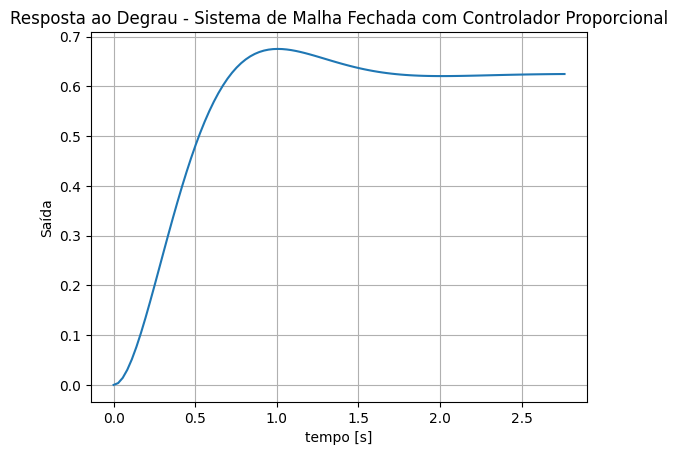

In [ ]:
import control as ctl
import matplotlib.pyplot as plt

# Parâmetros do sistema
num = [1]
den = [1, 5, 6]

# Função de transferência do sistema
G = ctl.tf(num, den)

# Controlador proporcional
Kp = 10
C = ctl.tf([Kp], [1])

# Sistema de malha fechada
G_closed = ctl.feedback(C * G)

# Resposta ao degrau
t, y = ctl.step_response(G_closed)

# Plot da resposta ao degrau
plt.plot(t, y)
plt.title('Resposta ao Degrau - Sistema de Malha Fechada com Controlador Proporcional')
plt.xlabel('tempo [s]')
plt.ylabel('Saída')
plt.grid()
plt.show()

FT malha aberta = <TransferFunction>: sys[259]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

    1
  -----
  s + 1


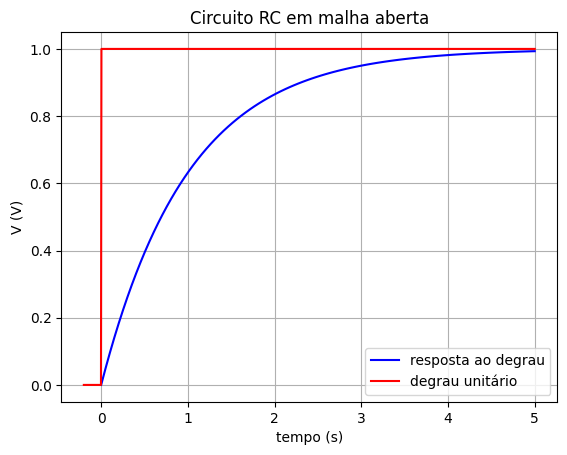

In [ ]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

# Função de transferência do controlador e do sistema (exemplo de sistema de primeira ordem)
C_s = ctl.tf([1.0], [1.0])  # Controlador
P_s = ctl.tf([1.0], [1.0, 1.0])  # Planta

# Sistema em malha aberta
G_open = ctl.series(C_s, P_s)
print('FT malha aberta =', G_open)

# Simulação da resposta ao degrau
Tsim = 5  # Tempo de simulação
T_oa, yout_oa = ctl.step_response(G_open, Tsim)

# Criação do degrau unitário
T2 = np.linspace(-0.2, Tsim, 1000)
degrau = np.ones_like(T2)
degrau[T2 < 0] = 0

# Plot da resposta ao degrau
plt.plot(T_oa, yout_oa, 'b-')
plt.plot(T2, degrau, 'r-')
plt.ylabel('V (V)')
plt.xlabel('tempo (s)')
plt.legend(['resposta ao degrau', 'degrau unitário'])
plt.title('Circuito RC em malha aberta')
plt.grid()
plt.show()

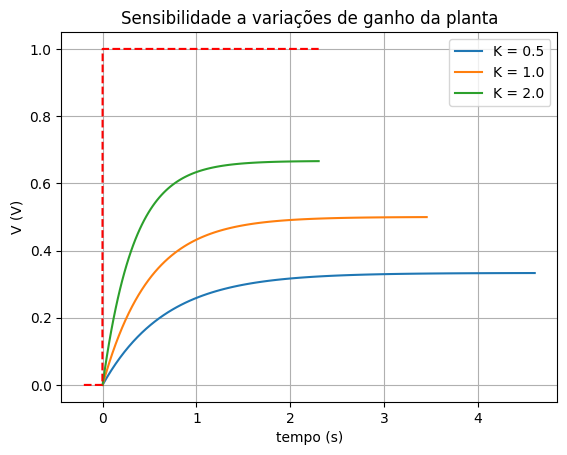

In [ ]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

# Definir a planta nominal (sistema original)
K_nominal = 1.0
P_s_nominal = ctl.tf([K_nominal], [1.0, 1.0])  # Planta nominal

# Controlador (exemplo de controlador proporcional)
C_s = ctl.tf([1.0], [1.0])

# Sistema em malha fechada nominal
G_nominal = ctl.series(C_s, P_s_nominal)
G1_nominal = ctl.feedback(G_nominal)

# Variar o ganho da planta para analisar a sensibilidade
K_varied = [0.5, 1.0, 2.0]
responses = []

for K in K_varied:
    P_s_varied = ctl.tf([K], [1.0, 1.0])  # Planta com ganho variado
    G_varied = ctl.series(C_s, P_s_varied)
    G1_varied = ctl.feedback(G_varied)
    T, yout = ctl.step_response(G1_varied)
    responses.append((T, yout, f'K = {K}'))

# Plot das respostas ao degrau para diferentes ganhos da planta
plt.figure()
for T, yout, label in responses:
    plt.plot(T, yout, label=label)

# Plot do degrau unitário
T2 = np.linspace(-0.2, max(T), 1000)
degrau = np.ones_like(T2)
degrau[T2 < 0] = 0
plt.plot(T2, degrau, 'r--')

# Configurações do gráfico
plt.ylabel('V (V)')
plt.xlabel('tempo (s)')
plt.legend(loc='best')
plt.title('Sensibilidade a variações de ganho da planta')
plt.grid()
plt.show()

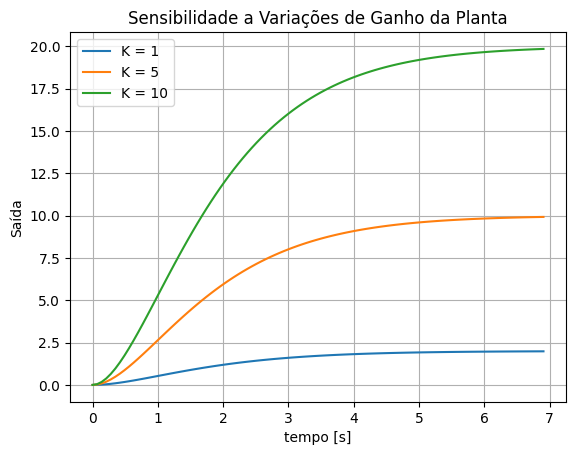

In [ ]:
import control as ctl
import matplotlib.pyplot as plt

# Parâmetros do sistema
num = [2]
den = [1, 2, 1]

# Função de transferência do sistema
G = ctl.tf(num, den)

# Ganhos variáveis
gains = [1, 5, 10]
for K in gains:
    G_var = K * G
    t, y = ctl.step_response(G_var)
    plt.plot(t, y, label=f'K = {K}')

plt.title('Sensibilidade a Variações de Ganho da Planta')
plt.xlabel('tempo [s]')
plt.ylabel('Saída')
plt.legend()
plt.grid()
plt.show()

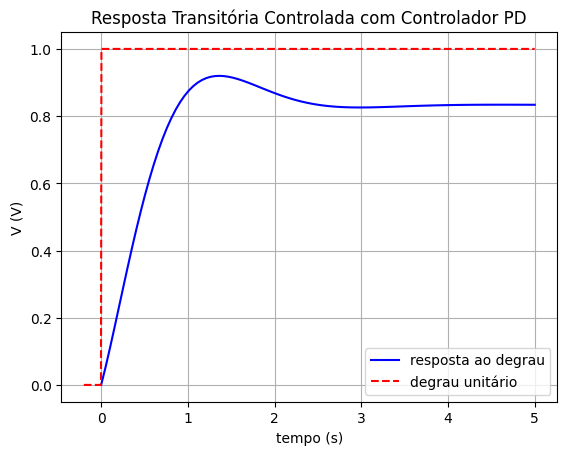

Informações da resposta transitória:
RiseTime: 0.65
SettlingTime: 2.23
SettlingMin: 0.76
SettlingMax: 0.92
Overshoot: 10.38
Undershoot: 0.00
Peak: 0.92
PeakTime: 1.35
SteadyStateValue: 0.83


In [ ]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

# Planta do sistema (sistema de segunda ordem simples)
P_s = ctl.tf([1.0], [1.0, 2.0, 1.0])  # Planta sem controlador

# Controlador PD
Kp = 5.0  # Ganho proporcional
Kd = 1.0  # Ganho derivativo
C_s = ctl.tf([Kd, Kp], [1.0])  # Controlador PD

# Sistema em malha fechada
G_s = ctl.series(C_s, P_s)
G1_s = ctl.feedback(G_s)

# Resposta ao degrau do sistema em malha fechada
Tsim = 5  # Tempo de simulação
T, yout = ctl.step_response(G1_s, Tsim)

# Criação do degrau unitário
T2 = np.linspace(-0.2, Tsim, 1000)
degrau = np.ones_like(T2)
degrau[T2 < 0] = 0

# Plot da resposta ao degrau
plt.plot(T, yout, 'b-')
plt.plot(T2, degrau, 'r--')
plt.ylabel('V (V)')
plt.xlabel('tempo (s)')
plt.legend(['resposta ao degrau', 'degrau unitário'])
plt.title('Resposta Transitória Controlada com Controlador PD')
plt.grid()
plt.show()

# Análise da resposta transitória
info = ctl.step_info(G1_s)
print('Informações da resposta transitória:')
for key, value in info.items():
    print(f'{key}: {value:.2f}')

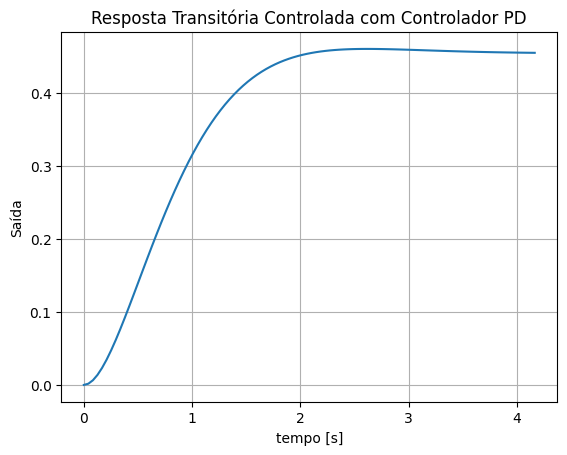

In [ ]:
import control as ctl
import matplotlib.pyplot as plt

# Parâmetros do sistema
num = [1]
den = [1, 6, 11, 6]

# Função de transferência do sistema
G = ctl.tf(num, den)

# Controlador PD
Kp = 5
Kd = 2
C = ctl.tf([Kd, Kp], [1])

# Sistema de malha fechada
G_PD = ctl.feedback(C * G)

# Resposta ao degrau
t, y = ctl.step_response(G_PD)

# Plot da resposta ao degrau
plt.plot(t, y)
plt.title('Resposta Transitória Controlada com Controlador PD')
plt.xlabel('tempo [s]')
plt.ylabel('Saída')
plt.grid()
plt.show()

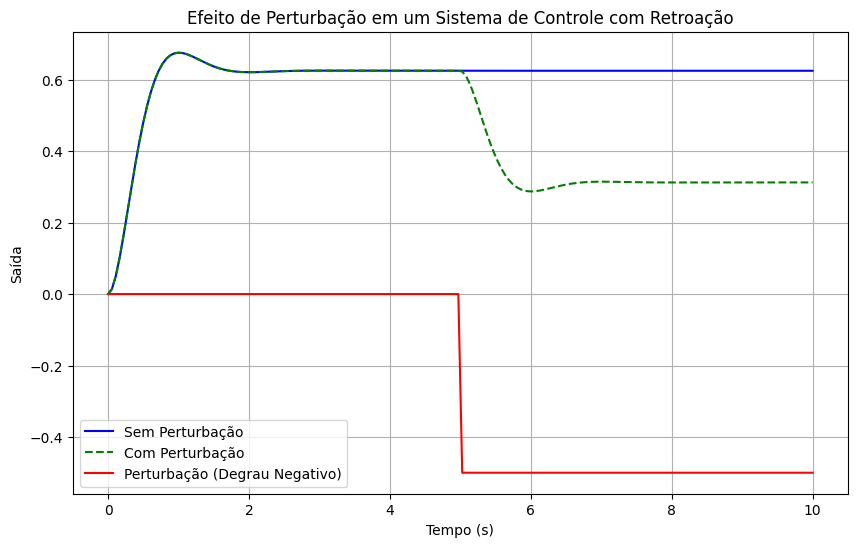

In [ ]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

# Definir a planta do sistema
P_s = ctl.tf([1.0], [1.0, 5.0, 6.0])  # Planta de segunda ordem

# Controlador proporcional simples
Kp = 10.0  # Ganho proporcional
C_s = ctl.tf([Kp], [1.0])

# Sistema em malha fechada (com retroação)
G_s = ctl.series(C_s, P_s)
G1_s = ctl.feedback(G_s)

# Simular a resposta ao degrau sem perturbação
Tsim = 10  # Tempo de simulação
T, yout_no_disturbance = ctl.step_response(G1_s, Tsim)

# Adicionar uma perturbação (um degrau negativo) ao sistema
T_disturbance = T  # Usar o mesmo tempo que a resposta ao degrau
disturbance = -0.5 * (T_disturbance > 5)  # Degrau negativo começando em t=5s

# Resposta ao degrau com perturbação
_, yout_with_disturbance = ctl.forced_response(G1_s, T_disturbance, disturbance)

# Plot das respostas ao degrau
plt.figure(figsize=(10, 6))

# Resposta sem perturbação
plt.plot(T, yout_no_disturbance, 'b-', label='Sem Perturbação')

# Resposta com perturbação
plt.plot(T, yout_no_disturbance + yout_with_disturbance, 'g--', label='Com Perturbação')

# Perturbação aplicada ao sistema
plt.plot(T_disturbance, disturbance, 'r-', label='Perturbação (Degrau Negativo)')

# Configurações do gráfico
plt.ylabel('Saída')
plt.xlabel('Tempo (s)')
plt.legend(loc='best')
plt.title('Efeito de Perturbação em um Sistema de Controle com Retroação')
plt.grid()
plt.show()

/tmp/ipython-input-1167739999.py:43: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/t, yc)


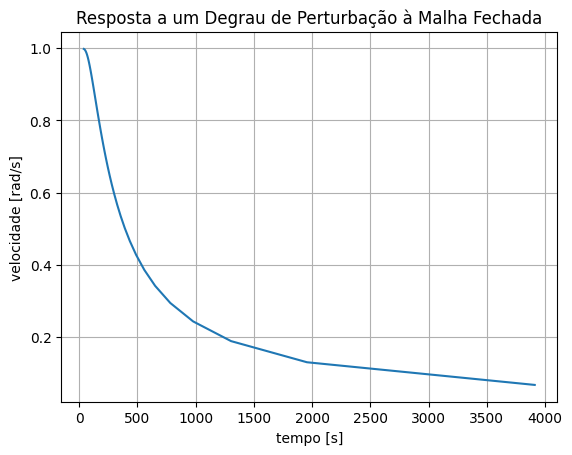

Erro de estado estacionário: 0.9980849972522448


In [ ]:
import control as ctl
import matplotlib.pyplot as plt

# Definindo os parâmetros do sistema
Ra = 1
Km = 10
J = 2
b = 0.5
Kb = 0.1
Ka = 54
Kt = 1

num1 = [1]
den1 = [J, b]

num2 = [Ka * Kt]
den2 = [1]

num3 = [Kb]
den3 = [1]

num4 = [Km / Ra]
den4 = [1]

# Criando as funções de transferência
G1 = ctl.tf(num1, den1)
G2 = ctl.tf(num2, den2)
G3 = ctl.tf(num3, den3)
G4 = ctl.tf(num4, den4)

# Combinação em série das funções de transferência
G_series = ctl.series(G1, G2)
G_parallel = ctl.parallel(G3, G4)

# Função de transferência final com retroação
G_open_loop = G_series * G_parallel
G_closed_loop = ctl.feedback(G_open_loop)

# Cálculo da resposta ao degrau da perturbação
t, yc = ctl.step_response(G_closed_loop)

# Plot da resposta ao degrau
plt.plot(1/t, yc)
plt.title('Resposta a um Degrau de Perturbação à Malha Fechada')
plt.xlabel('tempo [s]')
plt.ylabel('velocidade [rad/s]')
plt.grid()
plt.show()

# Erro de estado estacionário (último valor de saída)
erro_estacionario = yc[-1]
print(f"Erro de estado estacionário: {erro_estacionario}")

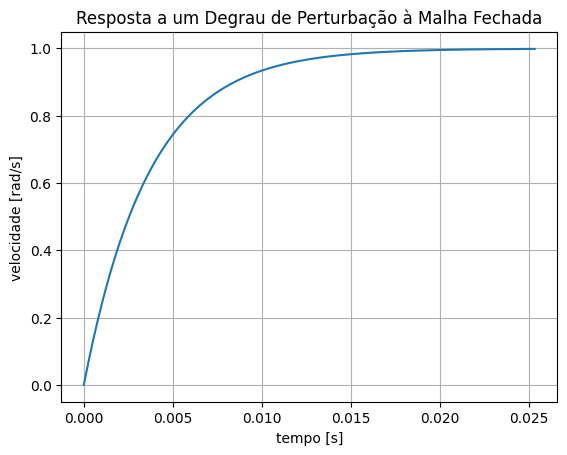

Erro de estado estacionário: 0.9980849972522448


In [ ]:
import control as ctl
import matplotlib.pyplot as plt

# Definindo os parâmetros do sistema
Ra = 1
Km = 10
J = 2
b = 0.5
Kb = 0.1
Ka = 54
Kt = 1

num1 = [1]
den1 = [J, b]

num2 = [Ka * Kt]
den2 = [1]

num3 = [Kb]
den3 = [1]

num4 = [Km / Ra]
den4 = [1]

# Criando as funções de transferência
G1 = ctl.tf(num1, den1)
G2 = ctl.tf(num2, den2)
G3 = ctl.tf(num3, den3)
G4 = ctl.tf(num4, den4)

# Combinação em série das funções de transferência
G_series = ctl.series(G1, G2)
G_parallel = ctl.parallel(G3, G4)

# Função de transferência final com retroação
G_open_loop = G_series * G_parallel
G_closed_loop = ctl.feedback(G_open_loop)

# Cálculo da resposta ao degrau da perturbação
t, yc = ctl.step_response(G_closed_loop)

# Plot da resposta ao degrau
plt.plot(t, yc)
plt.title('Resposta a um Degrau de Perturbação à Malha Fechada')
plt.xlabel('tempo [s]')
plt.ylabel('velocidade [rad/s]')
plt.grid()
plt.show()

# Erro de estado estacionário (último valor de saída)
erro_estacionario = yc[-1]
print(f"Erro de estado estacionário: {erro_estacionario}")


# Capítulo 5: O desempenho de sistemas de controle com reatroação

Este capítulo aborda as especificações de desempenho no domínio do tempo, como ultrapassagem percentual, tempo de acomodação, tempo de pico, tempo de subida e erro de estado estacionário. Também explora a relação entre o desempenho do sistema e a localização dos polos e zeros no plano s da função de transferência.

## Introdução
A capacidade de ajustar o desempenho transitório e permanente é uma vantagem dos sistemas de controle com retroação. Para projetar um sistema, é necessário definir métricas de desempenho e ajustar os parâmetros para alcançar a resposta desejada. A resposta transitória refere-se ao comportamento inicial do sistema, enquanto a resposta em regime permanente ocorre após um longo período. As especificações de projeto incluem índices temporais e a precisão em regime permanente, que indicam a qualidade do sistema.

## Sinais de Entrada para Teste
Como o desempenho dos sistemas de controle é avaliado no domínio do tempo, sinais de teste são utilizados para medir sua resposta. Os mais comuns são: degrau, rampa, parábola e impulso unitário. Esses sinais ajudam a avaliar a estabilidade e o desempenho do sistema.

## Índices de Desempenho
A teoria de controle moderno exige que o desempenho do sistema seja especificado quantitativamente. Um índice de desempenho é uma medida que reflete as especificações críticas do sistema. Um sistema é considerado ótimo quando seus parâmetros são ajustados para minimizar (ou maximizar) esse índice. Para ser útil, o índice deve ser sempre positivo ou nulo, permitindo a comparação e otimização do desempenho.


Simulações e Exemplos - Capítulo 5

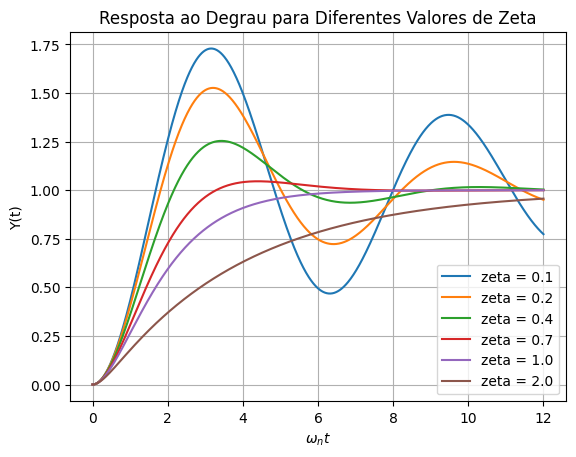

In [ ]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt

# Tempo de simulação
t = np.linspace(0, 12, 1000)  # Equivalente ao [0:0.01:12] em MATLAB

# Numerador da função de transferência
num = [1]

# Denominadores para diferentes valores de zeta
zeta_values = [0.1, 0.2, 0.4, 0.7, 1.0, 2.0]
den1 = [1, 2 * zeta_values[0], 1]
den2 = [1, 2 * zeta_values[1], 1]
den3 = [1, 2 * zeta_values[2], 1]
den4 = [1, 2 * zeta_values[3], 1]
den5 = [1, 2 * zeta_values[4], 1]
den6 = [1, 2 * zeta_values[5], 1]

# Calculando as respostas ao degrau
t, y1 = ctl.step_response(ctl.tf(num, den1), t)
t, y2 = ctl.step_response(ctl.tf(num, den2), t)
t, y3 = ctl.step_response(ctl.tf(num, den3), t)
t, y4 = ctl.step_response(ctl.tf(num, den4), t)
t, y5 = ctl.step_response(ctl.tf(num, den5), t)
t, y6 = ctl.step_response(ctl.tf(num, den6), t)

# Plotando as respostas
plt.plot(t, y1, label='zeta = 0.1')
plt.plot(t, y2, label='zeta = 0.2')
plt.plot(t, y3, label='zeta = 0.4')
plt.plot(t, y4, label='zeta = 0.7')
plt.plot(t, y5, label='zeta = 1.0')
plt.plot(t, y6, label='zeta = 2.0')

plt.xlabel(r'$\omega_n t$')
plt.ylabel('Y(t)')
plt.title('Resposta ao Degrau para Diferentes Valores de Zeta')
plt.grid(True)
plt.legend()
plt.show()

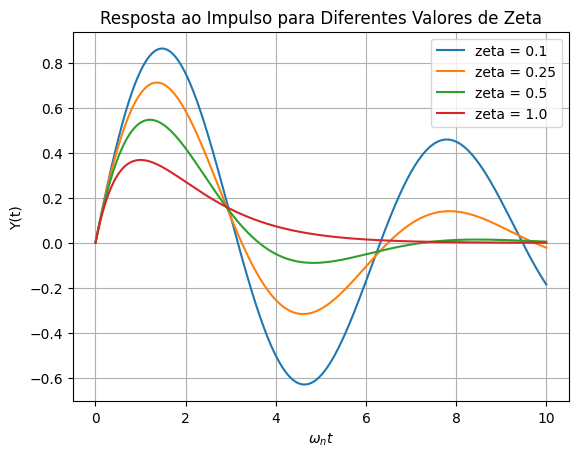

In [ ]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt

# Tempo de simulação
t = np.linspace(0, 10, 1000)  # Equivalente ao [0:0.01:10] em MATLAB

# Numerador da função de transferência
num = [1]

# Denominadores para diferentes valores de zeta
zeta_values = [0.1, 0.25, 0.5, 1.0]
den1 = [1, 2 * zeta_values[0], 1]
den2 = [1, 2 * zeta_values[1], 1]
den3 = [1, 2 * zeta_values[2], 1]
den4 = [1, 2 * zeta_values[3], 1]

# Calculando as respostas ao impulso
t, y1 = ctl.impulse_response(ctl.tf(num, den1), t)
t, y2 = ctl.impulse_response(ctl.tf(num, den2), t)
t, y3 = ctl.impulse_response(ctl.tf(num, den3), t)
t, y4 = ctl.impulse_response(ctl.tf(num, den4), t)

# Plotando as respostas ao impulso
plt.plot(t, y1, label='zeta = 0.1')
plt.plot(t, y2, label='zeta = 0.25')
plt.plot(t, y3, label='zeta = 0.5')
plt.plot(t, y4, label='zeta = 1.0')

plt.xlabel(r'$\omega_n t$')
plt.ylabel('Y(t)')
plt.title('Resposta ao Impulso para Diferentes Valores de Zeta')
plt.grid(True)
plt.legend()
plt.show()

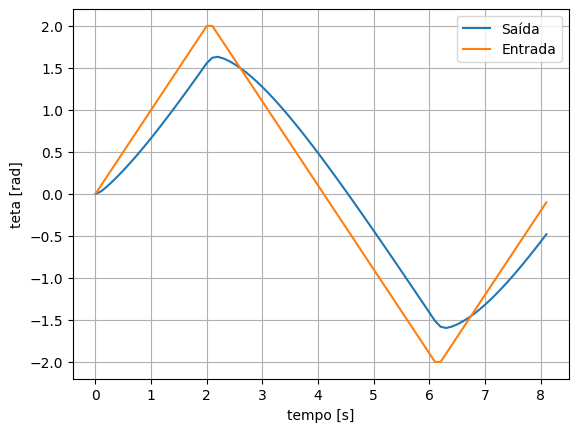

In [ ]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt

# Numerador e denominador da função de transferência de malha aberta
numg = [10, 20]
deng = [1, 10, 0]

# Fechamento da malha utilizando a função `feedback`
system = ctl.feedback(ctl.tf(numg, deng))

# Vetor de tempo
t = np.arange(0, 8.2, 0.1)  # Equivalente ao [0:0.1:8.2] em MATLAB

# Definição dos sinais de entrada `u`
v1 = np.arange(0, 2.1, 0.1)  # Equivalente ao [0:0.1:2]
v2 = np.arange(2, -2.1, -0.1)  # Equivalente ao [2:-0.1:-2]
v3 = np.arange(-2, 0.1, 0.1)  # Equivalente ao [-2:0.1:0]

# Concatenando os sinais de entrada em um único vetor
u = np.concatenate((v1, v2, v3))

# Certificando-se de que `u` tenha o mesmo comprimento que `t`
u = u[:len(t)]

# Simulação da resposta ao sinal de entrada utilizando `lsim`
t, y = ctl.forced_response(system, T=t, U=u)

# Plotando a resposta e o sinal de entrada
plt.plot(t, y, label='Saída')
plt.plot(t, u, label='Entrada')

plt.xlabel('tempo [s]')
plt.ylabel('teta [rad]')
plt.grid(True)
plt.legend()
plt.show()


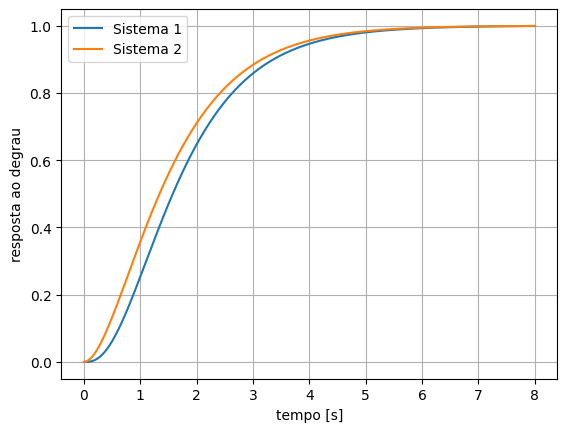

In [ ]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt

# Definindo as funções de transferência
num1 = [6]
den1 = [1, 6, 11, 6]
num2 = [1.6]
den2 = [1, 2.584, 1.6]

# Vetor de tempo equivalente a [0:0.01:8] no MATLAB
t = np.linspace(0, 8, 801)  # 801 pontos para uma resolução de 0.01 segundos

# Resposta ao degrau para os dois sistemas
t, y1 = ctl.step_response(ctl.tf(num1, den1), T=t)
t, y2 = ctl.step_response(ctl.tf(num2, den2), T=t)

# Plotando as respostas
plt.plot(t, y1, label='Sistema 1')
plt.plot(t, y2, label='Sistema 2')
plt.grid(True)
plt.xlabel('tempo [s]')
plt.ylabel('resposta ao degrau')
plt.legend()
plt.show()

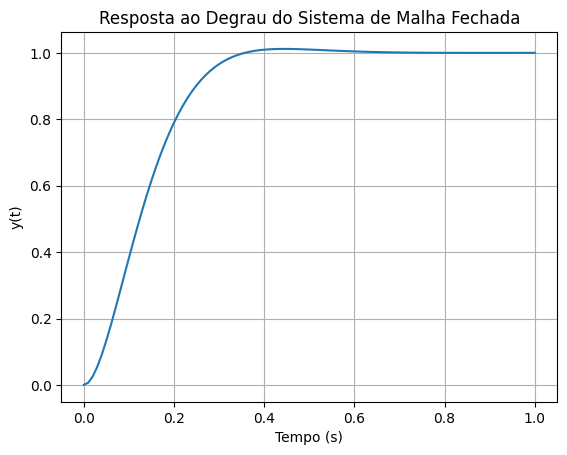

In [ ]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt

# Parâmetro Ka
Ka = 30

# Vetor de tempo equivalente a [0:0.01:1] em MATLAB
t = np.arange(0, 1.01, 0.01)  # 0.01 é o intervalo de amostragem

# Numeradores e denominadores das funções de transferência
nc = [Ka * 5]
dc = [1]
ng = [1]
dg = [1, 20, 0]

# Criação das funções de transferência
G_c = ctl.tf(nc, dc)  # Função de transferência do controlador
G_g = ctl.tf(ng, dg)  # Função de transferência do sistema

# Combinação em série das funções de transferência
G_open_loop = ctl.series(G_c, G_g)

# Fechamento da malha
G_closed_loop = ctl.feedback(G_open_loop)

# Resposta ao degrau do sistema de malha fechada
t, y = ctl.step_response(G_closed_loop, T=t)

# Plotando a resposta
plt.plot(t, y)
plt.grid(True)
plt.xlabel('Tempo (s)')
plt.ylabel('y(t)')
plt.title('Resposta ao Degrau do Sistema de Malha Fechada')
plt.show()

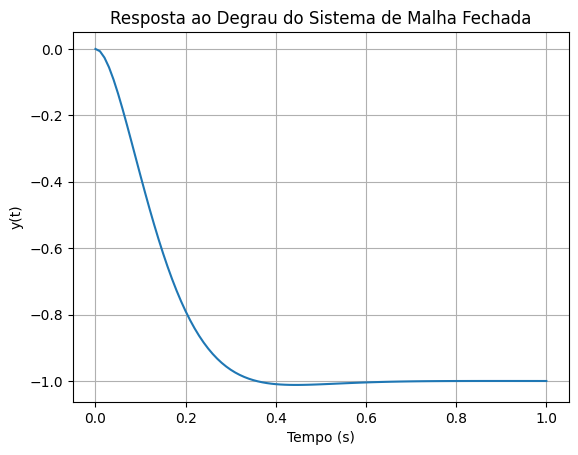

In [ ]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt

# Parâmetro Ka
Ka = 30

# Vetor de tempo equivalente a [0:0.01:1] em MATLAB
t = np.arange(0, 1.01, 0.01)  # 0.01 é o intervalo de amostragem

# Numeradores e denominadores das funções de transferência
nc = [Ka * 5]
dc = [1]
ng = [1]
dg = [1, 20, 0]

# Criação das funções de transferência
G_c = ctl.tf(nc, dc)  # Função de transferência do controlador
G_g = ctl.tf(ng, dg)  # Função de transferência do sistema

# Fechamento da malha com retroação
G_open_loop = ctl.series(G_c, G_g)
G_closed_loop = ctl.feedback(G_open_loop)

# Inversão do sinal da função de transferência
num, den = ctl.tfdata(G_closed_loop)
num = -np.squeeze(num)  # Inversão do sinal do numerador

# Criação da nova função de transferência para resposta ao degrau
G_cloop = ctl.tf(num, den)

# Resposta ao degrau do sistema de malha fechada
t, y = ctl.step_response(G_cloop, T=t)

# Plotando a resposta
plt.plot(t, y)
plt.grid(True)
plt.xlabel('Tempo (s)')
plt.ylabel('y(t)')
plt.title('Resposta ao Degrau do Sistema de Malha Fechada')
plt.show()

# Capítulo 6: A estabilidade de sistemas lineares com retroação

A estabilidade é um aspecto central no projeto de sistemas de controle em malha fechada, já que sistemas instáveis geralmente não têm utilidade prática. Um sistema estável deve apresentar uma saída limitada para uma entrada limitada, conceito conhecido como estabilidade entrada-limitada saída-limitada (BIBO). Este capítulo aborda métodos para analisar e garantir a estabilidade, com foco na localização das raízes da equação característica da função de transferência.

## Estabilidade e Retroação
A estabilidade de um sistema com retroação está diretamente relacionada à localização das raízes da equação característica. O método de Routh-Hurwitz é introduzido como uma ferramenta eficaz para determinar a estabilidade sem calcular explicitamente as raízes. Ele permite identificar quantas raízes estão no semiplano direito do plano s, indicando instabilidade se houver alguma.

## Conceito de Estabilidade
A estabilidade é crucial no projeto de sistemas de controle. Um sistema instável em malha fechada é praticamente inútil. A retroação pode estabilizar processos instáveis e ajustar o desempenho transitório. Para sistemas já estáveis em malha aberta, a retroação é usada para melhorar o desempenho em malha fechada, atendendo às especificações de projeto.

A estabilidade pode ser classificada como absoluta (sistema estável ou instável) ou relativa (grau de estabilidade). Um sistema estável é aquele que, quando submetido a uma entrada ou perturbação limitada, produz uma resposta também limitada em magnitude. Essa definição é fundamental para garantir que o sistema opere dentro de limites aceitáveis.

Simulações e Exemplos - Capítulo 6

In [ ]:
import numpy as np
import control as ctl

# Numeradores e denominadores das funções de transferência
numg = [1]
deng = [1, 1, 2, 23]

# Criação da função de transferência aberta
G_open_loop = ctl.tf(numg, deng)

# Fechamento da malha com retroação
G_closed_loop = ctl.feedback(G_open_loop)

# Extraindo numerador e denominador da função de transferência fechada
num, den = ctl.tfdata(G_closed_loop)
num = np.squeeze(num)
den = np.squeeze(den)

# Cálculo das raízes do polinômio denominador
roots_den = np.roots(den)

# Exibindo os resultados
print("Função de transferência fechada:")
print(f"Numerador: {num}")
print(f"Denominador: {den}")

print("Raízes do denominador:")
print(roots_den)

Função de transferência fechada:
Numerador: 1
Denominador: [ 1  1  2 24]
Raízes do denominador:
[-3.+0.j          1.+2.64575131j  1.-2.64575131j]


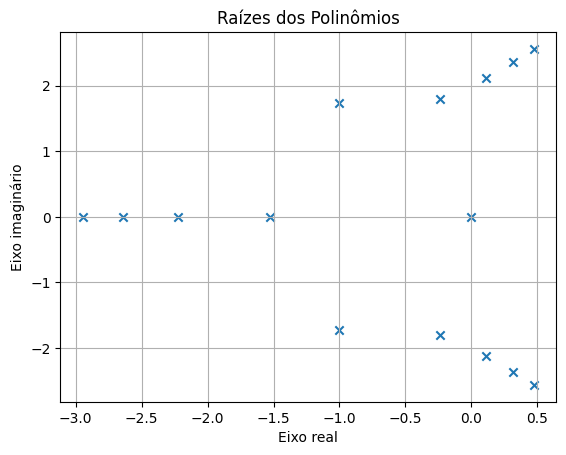

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definição dos valores de K
K = np.arange(0, 21, 5)  # [0:5:20] em MATLAB

# Inicialização de uma lista para armazenar as raízes
roots_list = []

# Cálculo das raízes para cada valor de K
for k in K:
    q = [1, 2, 4, k]
    roots = np.roots(q)
    roots_list.append(roots)

# Conversão da lista para um array numpy e separação das partes real e imaginária
roots_array = np.concatenate(roots_list)
real_parts = np.real(roots_array)
imaginary_parts = np.imag(roots_array)

# Plotagem das partes real e imaginária das raízes
plt.scatter(real_parts, imaginary_parts, marker='x')
plt.xlabel('Eixo real')
plt.ylabel('Eixo imaginário')
plt.grid(True)
plt.title('Raízes dos Polinômios')
plt.show()

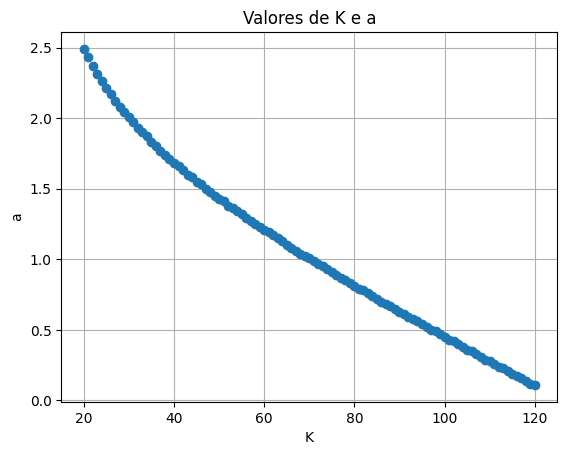

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definição dos intervalos de valores
a = np.arange(0.1, 3.01, 0.01)  # [0.1:0.01:3.0] em MATLAB
K = np.arange(20, 121, 1)       # [20:1:120] em MATLAB

# Inicialização dos vetores de resultados
X = np.zeros(len(K))
Y = np.zeros(len(K))

# Cálculo dos valores de X e Y
for i in range(len(K)):
    for j in range(len(a)):
        q = [1, 8, 17, K[i] + 10, K[i] * a[j]]
        p = np.roots(q)
        if np.max(np.real(p)) > 0:
            X[i] = K[i]
            Y[i] = a[j]
            break

# Plotagem dos resultados
plt.plot(X, Y, 'o')
plt.xlabel('K')
plt.ylabel('a')
plt.grid(True)
plt.title('Valores de K e a')
plt.show()

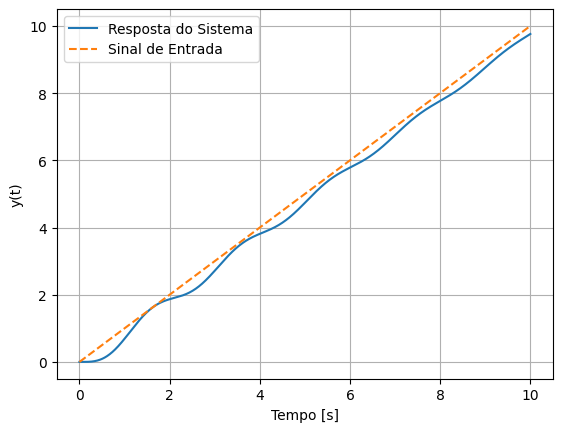

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Definição do vetor de tempo e sinal de entrada
t = np.arange(0, 10.01, 0.01)  # [0:0.01:10] em MATLAB
u = t

# Definição dos numeradores e denominadores das funções de transferência
numgc = [1, 0.6]
dengc = [1, 1]
numg = [70]
deng = [1, 7, 10, 0]

# Criação das funções de transferência
system_gc = ctl.tf(numgc, dengc)
system_g = ctl.tf(numg, deng)

# Combinação das funções de transferência em série
system_series = ctl.series(system_gc, system_g)

# Fechamento da malha
system_closed_loop = ctl.feedback(system_series)

# Simulação da resposta ao sinal de entrada
t, y = ctl.forced_response(system_closed_loop, T=t, U=u)

# Plotagem dos resultados
plt.plot(t, y, label='Resposta do Sistema')
plt.plot(t, u, label='Sinal de Entrada', linestyle='--')
plt.xlabel('Tempo [s]')
plt.ylabel('y(t)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import numpy as np

# Definindo a matriz A
A = np.array([[-8, -16, -6],
              [1, 0, 0],
              [0, 1, 0]])

# Obtendo o polinômio característico
p = np.poly(A)

# Encontrando as raízes do polinômio
r = np.roots(p)

print("Polinômio característico:", p)
print("Raízes do polinômio:", r)

Polinômio característico: [ 1.  8. 16.  6.]
Raízes do polinômio: [-5.0861302  -2.42800673 -0.48586307]


/tmp/ipython-input-1178924419.py:13: RuntimeWarning: invalid value encountered in divide
  K = P * (P - 1) / (P - 1 - Z)


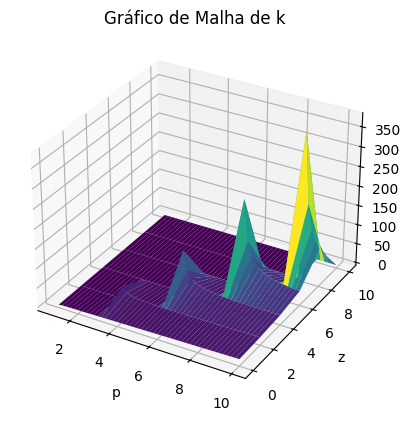

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definindo o intervalo dos valores de p e z
p = np.arange(1.0, 10.2, 0.2)
z = np.arange(0, 12, 2)

# Criando a grade de valores
P, Z = np.meshgrid(p, z)

# Calculando a matriz k
K = P * (P - 1) / (P - 1 - Z)

# Aplicando as condições
K[np.abs(Z - P + 1) < 1.0e-03] = 0
K[K < 0] = 0

# Criando o gráfico de malha
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# A ordem dos argumentos para plot_surface precisa ser consistente
X, Y = np.meshgrid(p, z)
ax.plot_surface(X, Y, K, cmap='viridis')

# Configurando os rótulos
ax.set_xlabel('p')
ax.set_ylabel('z')
ax.set_zlabel('k')
ax.set_title('Gráfico de Malha de k')

plt.show()

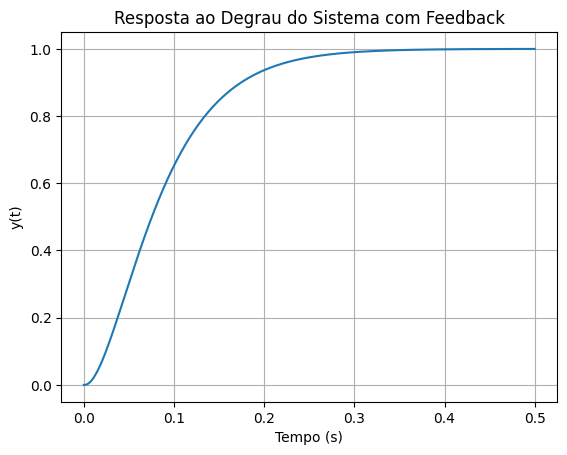

In [ ]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt

# Definindo os parâmetros
Ka = 100
K1 = 0.05

# Funções de transferência dos sistemas
ng1 = [5000]
dg1 = [1, 1000]
ng2 = [1]
dg2 = [1, 20, 0]
nc = [K1, 1]
dc = [0, 1]

# Criando as funções de transferência
sys1 = ctl.tf(Ka * np.array(ng1), np.array(dg1))
sys2 = ctl.tf(np.array(ng2), np.array(dg2))

# Sistema em série
series_sys = ctl.series(sys1, sys2)

# Sistema com feedback
closed_loop_sys = ctl.feedback(series_sys, ctl.tf(nc, dc))

# Tempo e resposta ao degrau
t = np.arange(0, 0.501, 0.001)
t, y = ctl.step_response(closed_loop_sys, t)

# Plotando a resposta ao degrau
plt.plot(t, y)
plt.grid(True)
plt.xlabel('Tempo (s)')
plt.ylabel('y(t)')
plt.title('Resposta ao Degrau do Sistema com Feedback')
plt.show()